5000エポックで学習した

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
model = torch.load('data_storage/CNN_L16_v2.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[ 1.1293, -1.8725,  2.1330],
                        [-1.6167, -1.6839,  0.1191],
                        [ 1.9421, -1.7973,  1.6520]]],
              
              
                      [[[-1.7242, -1.9806, -1.0430],
                        [-1.1582, -0.9846, -1.1209],
                        [-0.6714, -1.3063, -0.6097]]],
              
              
                      [[[-1.6353, -1.8683, -0.8680],
                        [ 1.8875,  1.8031,  2.1874],
                        [-0.3343,  0.1615, -1.3379]]],
              
              
                      [[[-1.3104, -1.3311, -1.6591],
                        [ 0.1776,  1.6831, -1.5306],
                        [ 0.5913,  1.7138,  1.6453]]],
              
              
                      [[[ 0.0895,  1.8419,  1.5883],
                        [ 0.6789,  1.0948,  1.8867],
                        [-0.4060,  1.0887,  1.9022]]]])),
             ('fc.0.weight',
            

In [3]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[ 1.1293, -1.8725,  2.1330],
          [-1.6167, -1.6839,  0.1191],
          [ 1.9421, -1.7973,  1.6520]]],


        [[[-1.7242, -1.9806, -1.0430],
          [-1.1582, -0.9846, -1.1209],
          [-0.6714, -1.3063, -0.6097]]],


        [[[-1.6353, -1.8683, -0.8680],
          [ 1.8875,  1.8031,  2.1874],
          [-0.3343,  0.1615, -1.3379]]],


        [[[-1.3104, -1.3311, -1.6591],
          [ 0.1776,  1.6831, -1.5306],
          [ 0.5913,  1.7138,  1.6453]]],


        [[[ 0.0895,  1.8419,  1.5883],
          [ 0.6789,  1.0948,  1.8867],
          [-0.4060,  1.0887,  1.9022]]]])

In [4]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

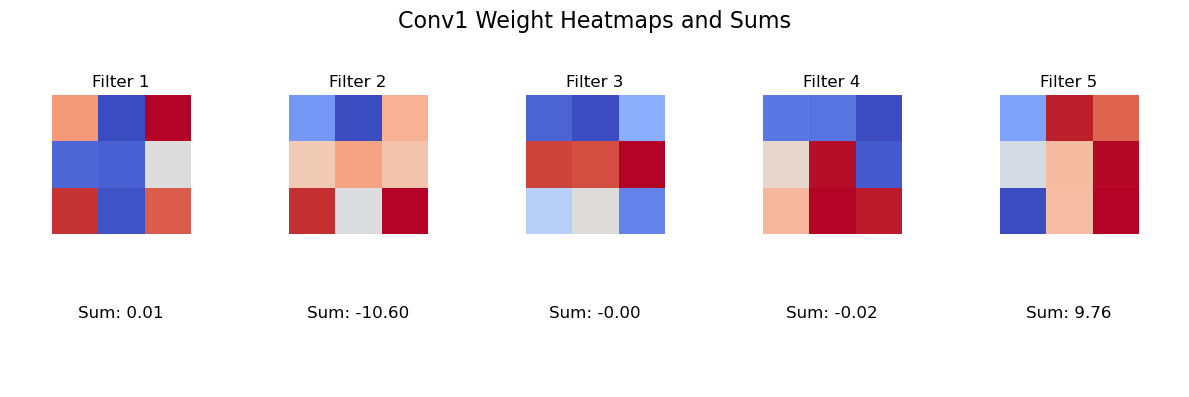

In [5]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-1.1006e-01, -4.5225e-02, -3.6369e-02,  ...,  1.8433e-04,
         -2.6499e-02,  2.0433e-01],
        [-6.7817e-02, -5.2747e-02, -2.0208e-01,  ...,  3.2108e-01,
          4.8235e-01,  2.6117e-01],
        [-1.8971e-01, -1.8299e-01, -2.3615e-01,  ..., -6.3300e-02,
          1.1666e-01,  1.9762e-01],
        ...,
        [ 1.5079e-01,  1.3389e-01,  2.6292e-01,  ..., -3.8231e-01,
         -4.4208e-01, -1.8383e-01],
        [ 4.2082e-01,  2.3672e-01,  2.2808e-01,  ..., -7.9846e-03,
         -2.2497e-01,  1.3884e-01],
        [ 4.1169e-01,  5.5974e-01,  1.3746e-01,  ...,  4.9384e-02,
          5.9614e-02,  1.3916e-01]])

In [7]:
fc_weight.size()

torch.Size([25, 80])

In [8]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [9]:
fc_weight_np_square

array([[-1.10062435e-01, -6.78170323e-02, -1.89712599e-01, ...,
         1.50785550e-01,  4.20818180e-01,  4.11689609e-01],
       [-4.52250279e-02, -5.27473353e-02, -1.82994798e-01, ...,
         1.33891866e-01,  2.36719787e-01,  5.59743583e-01],
       [-3.63693833e-02, -2.02075034e-01, -2.36146867e-01, ...,
         2.62923598e-01,  2.28075042e-01,  1.37460873e-01],
       ...,
       [ 1.84330478e-04,  3.21079254e-01, -6.32997751e-02, ...,
        -3.82310480e-01, -7.98460562e-03,  4.93841134e-02],
       [-2.64992546e-02,  4.82345581e-01,  1.16658516e-01, ...,
        -4.42077756e-01, -2.24973097e-01,  5.96143901e-02],
       [ 2.04325736e-01,  2.61171252e-01,  1.97618052e-01, ...,
        -1.83826819e-01,  1.38841346e-01,  1.39156878e-01]], dtype=float32)

In [10]:
fc_weight_np_square.shape

(80, 25)

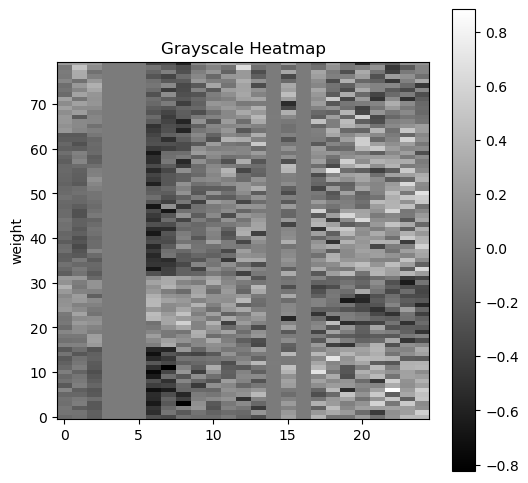

In [11]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [12]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-3.0188115e+00, -2.3451445e+00, -2.6684899e+00, -8.2381181e-02,
       -8.3198383e-02, -8.3246894e-02, -2.1888145e+01, -1.4314688e+01,
       -8.9310532e+00, -2.7608335e+00,  2.1531196e+00,  1.9002206e+00,
        4.2611952e+00,  3.2024529e+00, -2.1381874e-02,  3.3236361e+00,
       -6.7869462e-02,  3.5574932e+00,  3.8506186e+00,  3.9401355e+00,
        5.5113811e+00,  4.1497984e+00,  5.9258685e+00,  5.5429258e+00,
        7.0078483e+00], dtype=float32)

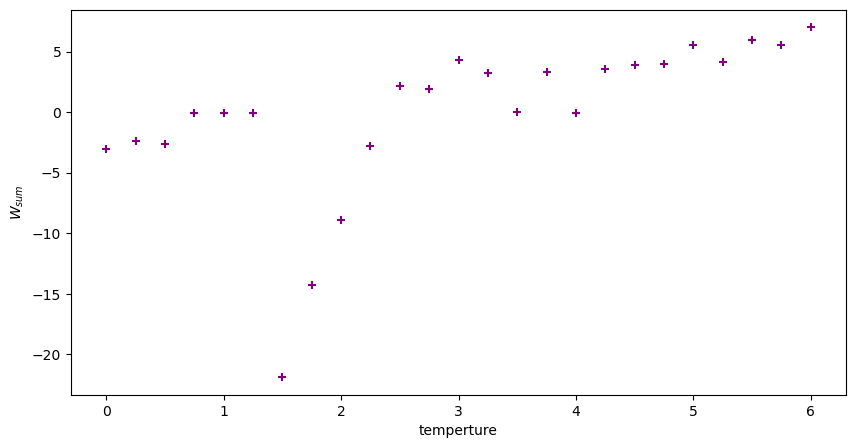

In [13]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [14]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 4.0,
 2.0,
 1.3333333333333333,
 1.0,
 0.8,
 0.6666666666666666,
 0.5714285714285714,
 0.5,
 0.4444444444444444,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.3076923076923077,
 0.2857142857142857,
 0.26666666666666666,
 0.25,
 0.23529411764705882,
 0.2222222222222222,
 0.21052631578947367,
 0.2,
 0.19047619047619047,
 0.18181818181818182,
 0.17391304347826086,
 0.16666666666666666]

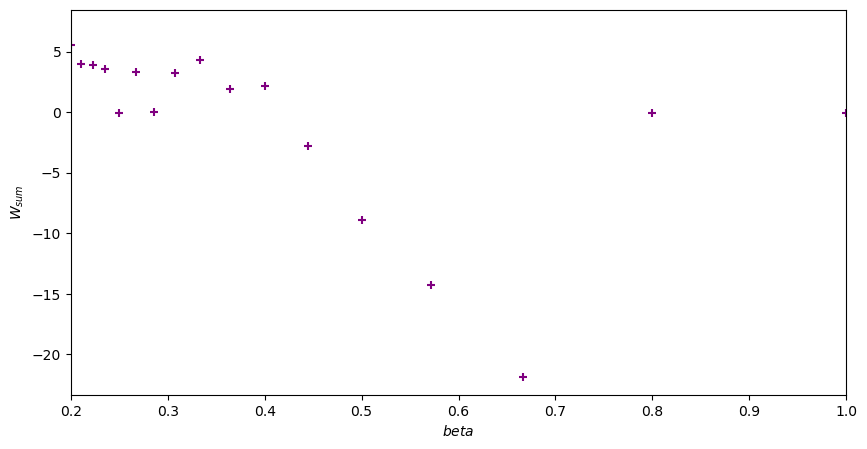

In [15]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()